<a href="https://colab.research.google.com/github/misheljoy/Projects/blob/main/Netflix_Data_Visualization_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining Problem Statement and Analysing basic metrics :


*   analysing the dataset given for the ott platform and coming up with business insights and recommendations



In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

--2023-02-18 10:18:08--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.226.251.107, 13.226.251.62, 13.226.251.17, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.226.251.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv.2’

netflix.csv.2       100%[===================>]   3.24M  --.-KB/s    in 0.06s   

2023-02-18 10:18:08 (58.1 MB/s) - ‘netflix.csv.2’ saved [3399671/3399671]



In [ ]:
#  loading the data
import pandas as pd
import numpy as np
data = pd.read_csv("netflix.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# missing value detection
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# droping the rows which dont have neither director or cast information
data.dropna(subset= ["director","cast"],how = "all",inplace = True)

In [ ]:
# Missing Value Treatment
mode_by_direc = data.groupby("cast")["director"].transform(lambda x : x.mode()[0] if not x.mode().empty else None)
data["director"].fillna(mode_by_direc, inplace = True)

mode_by_direc = data.groupby("country")["director"].transform(lambda x : x.mode()[0] if not x.mode().empty else None)
data["director"].fillna(mode_by_direc, inplace = True)

mode_by_cast = data.groupby("director")["cast"].transform(lambda x : x.mode()[0] if not x.mode().empty else None)
data["cast"].fillna(mode_by_cast, inplace = True)

mode_by_cast = data.groupby("country")["cast"].transform(lambda x : x.mode()[0] if not x.mode().empty else None)
data["cast"].fillna(mode_by_cast, inplace = True)

mode_by_country = data.groupby("director")["country"].transform(lambda x : x.mode()[0] if not x.mode().empty else None)
data["country"].fillna(mode_by_country, inplace = True)

mode_by_country = data.groupby("cast")["country"].transform(lambda x : x.mode()[0] if not x.mode().empty else None)
data["country"].fillna(mode_by_country, inplace = True)

In [ ]:
data["date_added"].fillna(data["date_added"].mode()[0],inplace = True)

data["rating"].fillna(data["rating"].mode()[0],inplace = True)

data["duration"].fillna(0,inplace = True)

data["director"].fillna("unknown",inplace = True)
data["country"].fillna("unknown",inplace = True)
data["cast"].fillna("unknown",inplace = True)

In [ ]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Observations on the shape of data, data types of all the attributes and statistical summary
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8455 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8455 non-null   object
 1   type          8455 non-null   object
 2   title         8455 non-null   object
 3   director      8455 non-null   object
 4   cast          8455 non-null   object
 5   country       8455 non-null   object
 6   date_added    8455 non-null   object
 7   release_year  8455 non-null   int64 
 8   rating        8455 non-null   object
 9   duration      8455 non-null   object
 10  listed_in     8455 non-null   object
 11  description   8455 non-null   object
dtypes: int64(1), object(11)
memory usage: 858.7+ KB


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(8455, 12)

In [ ]:
data.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8455,8455,8455,8455,8455,8455,8455,8455,8455,8455,8455
unique,8455,2,8455,4529,7693,743,1752,17,221,508,8429
top,s1,Movie,Dick Johnson Is Dead,Marcus Raboy,Jeff Dunham,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6077,1,630,166,2727,118,3063,1555,362,4


In [ ]:
# Data pre-processing which involves unnesting of the data in columns like cast, Director, Country and listed_in
data["cast"]=data["cast"].str.split(",")
data = data.explode("cast")

In [ ]:
data["director"]=data["director"].str.split(",")
data = data.explode("director")

In [ ]:
data["country"]=data["country"].str.split(",")
data = data.explode("country")

In [ ]:
data["listed_in"]=data["listed_in"].str.split(",")
data = data.explode("listed_in")

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Jeff Dunham,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Adze Ugah,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Adze Ugah,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Adze Ugah,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Adze Ugah,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
data["duration"] = data["duration"].str.split(" ").str.get(0)
data["duration"].fillna(0,inplace = True)
data["duration"]=data["duration"].astype("int")
data


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Jeff Dunham,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Adze Ugah,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Adze Ugah,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Adze Ugah,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Adze Ugah,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


** Non-Graphical Analysis: Value counts and unique attributes **


In [ ]:
# the number of countries netflix is operating
data["country"].nunique()

198

In [ ]:
# Most popular cast
famous_actor =data.groupby("cast")["title"].nunique()
famous_actor.sort_values(ascending = False)

cast
Jeff Dunham            167
unknown                 97
David Attenborough      50
 Anupam Kher            39
 Rupa Bhimani           33
                      ... 
 Juana del Río           1
 Juana Viale             1
 Juana Collignon         1
 Juan Ángel Esparza      1
Ṣọpẹ́ Dìrísù             1
Name: title, Length: 39297, dtype: int64

In [ ]:
# Most popular director
famous_director =data.groupby("director")["title"].nunique()
famous_director.sort_values(ascending = False)

director
Marcus Raboy           630
unknown                394
Alastair Fothergill    184
Toshiya Shinohara      164
Park Hoon-jung         150
                      ... 
James Hawes              1
James Ivory              1
James L. Brooks          1
James Lee                1
Joaquín Mazón            1
Name: title, Length: 5121, dtype: int64

In [ ]:
# countries having highest content
famous_country =data.groupby("country")["title"].nunique()
famous_country.sort_values(ascending = False)

country
United States     3118
India             1053
United Kingdom     598
unknown            549
 United States     477
                  ... 
Namibia              1
 Ethiopia            1
 Ukraine             1
 Ecuador             1
 Sudan               1
Name: title, Length: 198, dtype: int64

In [ ]:
# most popular actor- director pair
actor_director =data.groupby(["director","cast"])["title"].nunique()
actor_director.sort_values(ascending = False)

director           cast             
Rajiv Chilaka       Julie Tejwani       22
                    Rajesh Kava         22
Toshiya Shinohara   Takahiro Sakurai    21
Rajiv Chilaka       Jigna Bhardwaj      21
                    Rupa Bhimani        21
                                        ..
Evan Goldberg       Reese Alexander      1
                    Seth Rogen           1
                    Timothy Simons       1
                   James Franco          1
Şenol Sönmez       Murat Boz             1
Name: title, Length: 66593, dtype: int64

In [ ]:
# most polular actor in every country
national_star =data.groupby(["country","cast"])["title"].nunique()
national_star.sort_values(ascending = False)

country         cast               
United States   Jeff Dunham            167
unknown         unknown                 39
United Kingdom  David Attenborough      39
India            Anupam Kher            36
Japan            Takahiro Sakurai       28
                                      ... 
Egypt           Nour El-Sherif           1
                Omar Sharif              1
                Rady Gamal               1
                Riham Abdel Ghafour      1
                 Ahmad Abu Sal'oum       1
Name: title, Length: 59922, dtype: int64

In [ ]:
# the most popular genre
famous_genre =data.groupby("listed_in")["title"].nunique()
famous_genre.sort_values(ascending = False)

listed_in
 International Movies        2603
Dramas                       1593
Comedies                     1206
Action & Adventure            856
 Dramas                       827
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
Sports Movies                   1
TV Sci-Fi & Fantasy             1
Name: title, Length: 73, dtype: int64

In [ ]:
# category propotion
category = data.groupby("type")["title"].nunique()
total = category.sum()
category_prop = (category/total)*100
category_prop

type
Movie      71.87463
TV Show    28.12537
Name: title, dtype: float64

In [ ]:
# average duration
avg_duration = data.groupby("type")["duration"].median()
avg_duration

type
Movie      103.0
TV Show      1.0
Name: duration, dtype: float64

graphical analysis


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


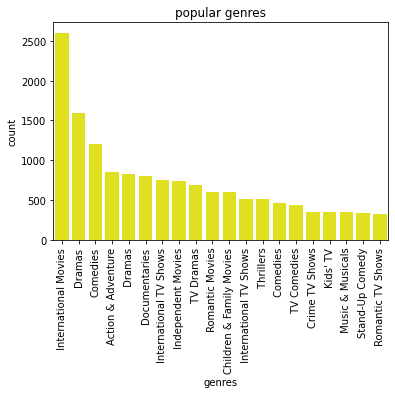

In [ ]:
# Top 10 content type availabile in netflix
content_availability = data.groupby("listed_in")["title"].nunique()
content_availability = content_availability.nlargest(20)
sns.barplot(x= content_availability.index,y= content_availability.values,color= "yellow")
plt.xticks(rotation= 90)
plt.xlabel("genres")
plt.ylabel("count")
plt.title("popular genres")
plt.show()

In [ ]:
df = pd.read_csv("netflix.csv")


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


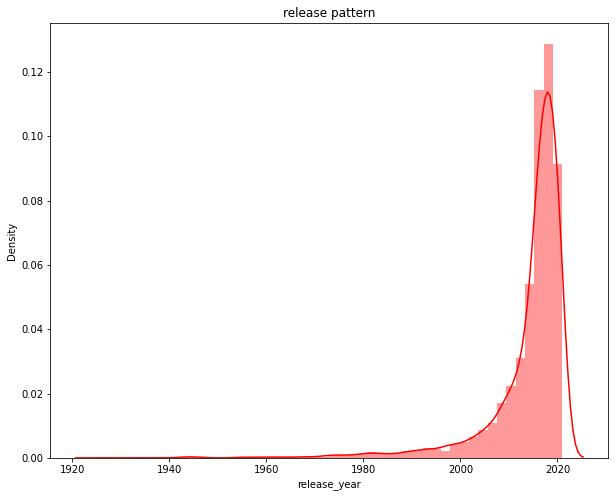

In [ ]:
# number of movies/Tv shows released per year
plt.figure(figsize=(10,8))
sns.distplot(df["release_year"],color='red')
plt.title("release pattern")
plt.show()

In [ ]:
df["date_added"].fillna(df["date_added"].mode()[0],inplace = True)
df["date_added"]=pd.to_datetime(df["date_added"])
df['month'] = df["date_added"].dt.month_name()
df["year_added"] = df["date_added"].dt.year
df["diff"]= df["year_added"]- df["release_year"]

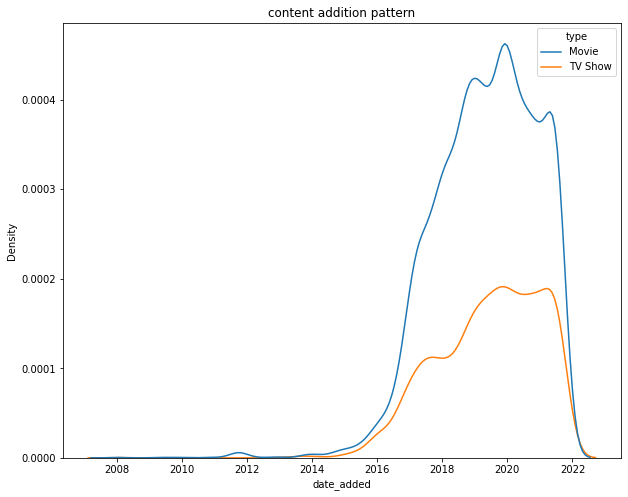

In [ ]:
# Does Netflix has more focus on TV Shows than movies in recent years.
plt.figure(figsize=(10,8))
sns.kdeplot(data = df,x ="date_added",hue='type')
plt.title("content addition pattern")
plt.show()


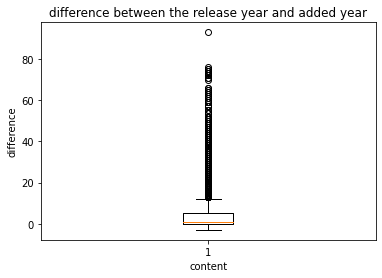

In [ ]:
plt.boxplot(df["diff"])

plt.title("difference between the release year and added year")
plt.xlabel("content")
plt.ylabel("difference")
plt.show()

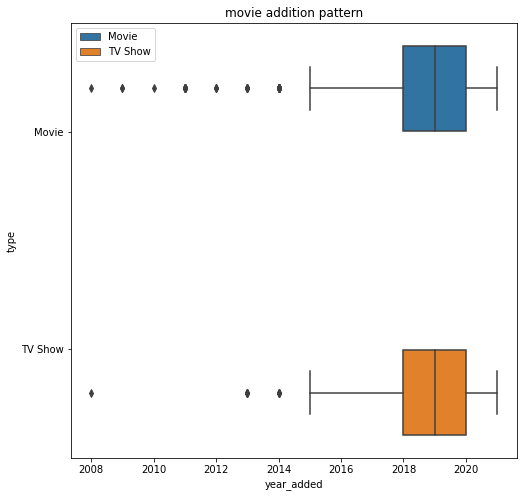

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x='year_added',y='type',hue='type')
plt.legend(loc='upper left')
plt.title("movie addition pattern")
plt.show()


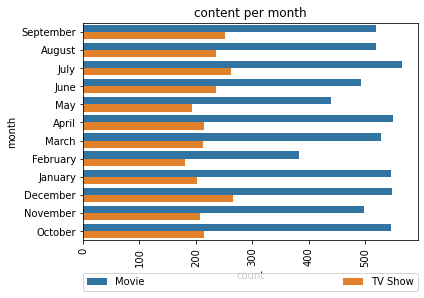

In [ ]:
sns.countplot(data= df,y="month",hue ="type")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0)
plt.title("content per month")
plt.show()


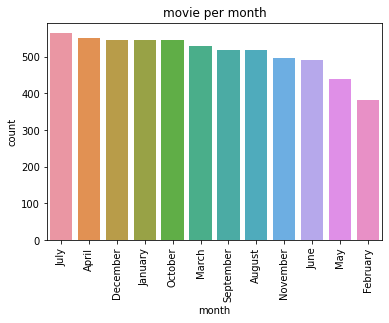

In [ ]:
# movie_release across month
moviemonth = df[df["type"]== "Movie"]
movie_month = moviemonth["month"].value_counts()
sns.countplot(data = moviemonth, x = "month" ,order = moviemonth["month"].value_counts().index)
plt.xticks(rotation = 90)
plt.title("movie per month")
plt.show()

Text(0.5, 1.0, 'TV show per month')

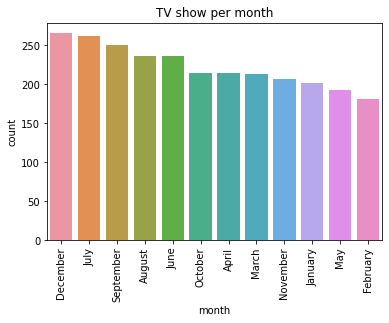

In [ ]:
# Tv show_release across month
Tvmonth = df[df["type"]== "TV Show"]
tv_month = Tvmonth["month"].value_counts()
sns.countplot(data = Tvmonth, x = "month" ,order = Tvmonth["month"].value_counts().index)
plt.xticks(rotation = 90)
plt.title("TV show per month")

In [ ]:
# Insights based on Non-Graphical and Visual Analysis
# ** Non-Graphical Insights**
# •	Netflix have content from 198 different countries
# •	Most poular cast is Jeff Dunham like we observed in the statistical description
# •	Most popular director is Marcus Raboy
# •	Most contents are from United States
# •	Rajiv Chilaka - Julie Tejwani and Rajiv Chilaka - Rajesh Kava is the most occurred director cast pair
# •	the most popular genres are international movies, dramas, comedies
# •	movies and Tv shows are in proportion 72:28
# •	Average duration of a movie is 103 mins and TV show is 1 season

# Visual Analysis
# •	The popular genres among all the contents are analysed in this graph in decreasing order. The three most popular genres are International movies, dramas, comedies
# •	There is a steep increase in the number of the movie releases after 2000
# •	Though the number of tv shows getting added have increased in present years, still number of movies added are more than the number of TV shows
# •	The difference between the release year of a movie and year it got added to Netflix give and insight about the delay for content to be released in ott. The median is coming nearly zero.
# •	The most of movies are added in between 2018,2019
# •	The most movies are released on July, April , December , January
# •	Most TV shows are released December, July and September


In [ ]:
# Business Insights
# •	The most popular cast, director, director-cast pair indicates the audience interest in those content
# •	On and after covid there is exponential increase in the content addition
# •	The median difference between the release year and addition to the platform being nearly zero is a good hint of less delay.
# •	The most movies and Tv shows are released are in summer vacation time (april and july(us) ) and winter vacation time

# Recommendations
# •	Getting more contents having ppl favourite actor, director, genres, actor – director can bring more audience. Finding these for every country can be used attract more audience from countries with less subscribers
# •	The more content addition including tv shows as much movies can attract more subscribers as post covid lockdowns as customers are willing to try more on ott platforms
# •	More content releases especially tv shows before vacation time is preferable
